### Raw NN
[https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from exit import NeuralNetwork
from exit.layers import Dense
from exit.initializers import GlorotUniform, GlorotNormal
from exit.activations import Sigmoid, Relu
from exit.losses import CrossEntropy, L2
from exit.optimizers import Momentum, RMSProp, Adam, GradientDescent

### Regression

loss 0 : 1693.2780475163493
loss 99 : 11.275827633984303


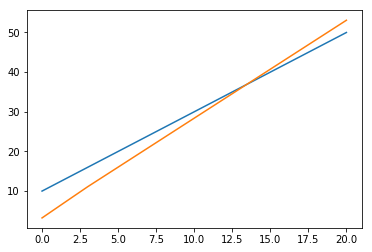

In [3]:
nn = NeuralNetwork()
input = np.linspace(0,20,21).reshape(-1,1)
output = (input*2+10)
nn.sequence(
    input.shape[1],
    Dense(4, Relu),
    Dense(1),
)
for i in range(100):
    predict = nn.train(input, output, L2, learning_rate=0.00003)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])
        
plt.plot(input, output)
plt.plot(input, nn.predict(input))

### Regression Deep

loss 0 : 19995138.8179528
loss 99 : 1106534.301234639
loss 198 : 886477.7991575584
loss 297 : 649688.8446256754
loss 396 : 433226.1508088631
loss 495 : 278618.0310580728
loss 594 : 181763.26205509886
loss 693 : 122806.88512607072
loss 792 : 87173.9547292672
loss 891 : 64899.02839481203
loss 990 : 50386.59501677949


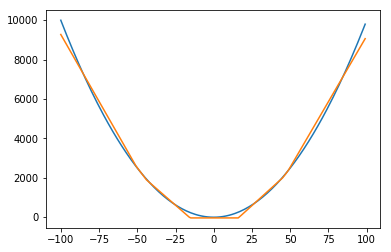

In [3]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

input = np.arange(-100,100).reshape(-1, 1)
output = np.power(input, 2) - 5

nn.sequence(
    input.shape[1],
    Dense(6, Relu),
    Dense(1),
)
for i in range(1000):
    predict = nn.train(input, output, L2, learning_rate=0.1)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

plt.plot(input, output)
plt.plot(input, nn.predict(input))

array([[ 2.14316084, -5.07495347,  5.08198484, -2.11184252,  1.99881411,
        -2.03392527]])

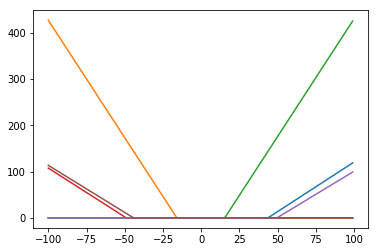

In [363]:
# visualize activation functions
for i in range(6): 
    w = nn._network[0]._weights[0, i]
    b = nn._network[0]._bias[0, i]
    z = np.dot(input, w) + b
    a = nn._network[0]._activation_function.feed_forward(z)
    plt.plot(input, a)
nn._network[0]._weights

### Regression with Batch Norm

loss 0 : 12181.047475183726
loss 99 : 122.13632885571867
loss 198 : 7.921943976433488
loss 297 : 18.430180880473785
loss 396 : 11.932746021441742
loss 495 : 30.521947012582995
loss 594 : 13.92123232440289
loss 693 : 29.213716442162433
loss 792 : 10.820705844218779
loss 891 : 34.072192016909405
loss 990 : 25.300750617892646


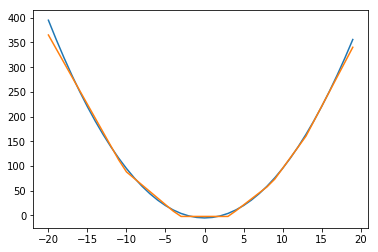

In [4]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

nn.sequence(
    1,
    Dense(6, Relu),
    Dense(1),
)
for i in range(1000):
    min = np.random.uniform(-20, -10)
    max = np.random.uniform(10, 20)
    input = np.random.uniform(min, max, (200, 1))
#     input = np.random.uniform(-100, 100, (200, 1))
#     input = 200 * np.random.randn(200, 1) - 100
    output = np.power(input, 2) - 5
    
    predict = nn.train(input, output, L2, learning_rate=0.1)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

input = np.arange(-20,20).reshape(-1, 1)
output = np.power(input, 2) - 5

plt.plot(input, output)
plt.plot(input, nn.predict(input))

loss 0 : 8746.791344465433
loss 99 : 5154.739674954062
loss 198 : 1737.5645013062801
loss 297 : 1015.2680848784105
loss 396 : 1245.6247696323394
loss 495 : 4010.2031080920847
loss 594 : 852.4750451300481
loss 693 : 905.1233597755388
loss 792 : 6248.978821186849
loss 891 : 8503.438949484647
loss 990 : 2712.658261177614


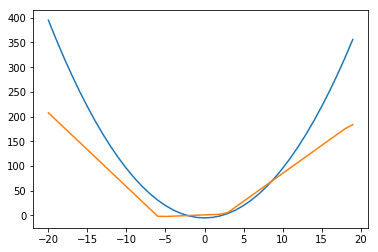

In [5]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

nn.sequence(
    1,
    Dense(6, Relu, is_batch_norm=True),
    Dense(1, is_batch_norm=True),
)
for i in range(1000):
    min = np.random.uniform(-20, -10)
    max = np.random.uniform(10, 20)
    input = np.random.uniform(min, max, (200, 1))
#     input = 1000 * np.random.randn(2000, 1) - 500
    output = np.power(input, 2) - 5
    
    predict = nn.train(input, output, L2, learning_rate=3)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

input = np.arange(-20,20).reshape(-1, 1)
output = np.power(input, 2) - 5

plt.plot(input, output)
plt.plot(input, nn.predict(input))

### Classifiaction

In [364]:
nn = NeuralNetwork()
input = np.linspace(0,20,100).reshape(-1,1)
output = (input*2+10 > 30).astype(int)
nn.sequence(
    input.shape[1],
    Dense(1, Sigmoid),
)
for i in range(1000):
    predict = nn.train(input, output, CrossEntropy, learning_rate=0.01)
    if i%99 is 0:
        print(f'loss: {i} = ', predict['loss'])

loss: 0 =  1.557488600583796
loss: 99 =  0.744353988078051
loss: 198 =  0.07156733395421572
loss: 297 =  0.2626066581362975
loss: 396 =  0.4744002835201866
loss: 495 =  0.16074839235477445
loss: 594 =  0.179596328257098
loss: 693 =  0.08578371670066326
loss: 792 =  0.07183707077508224
loss: 891 =  0.04513439888253595
loss: 990 =  0.03572756282230688


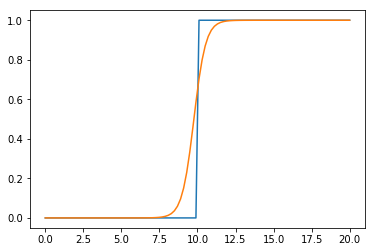

In [365]:
plt.plot(input, output)
plt.plot(input, nn.predict(input))

In [9]:
x = np.random.randn(100000)*2 + 10
mean = np.mean(x)
sd = np.sqrt(np.sum( np.square(x-mean) ) / (x.shape[0]-1)  )
sd, mean

(2.001299760573178, 9.994964414615657)

In [6]:
np.array([[1,2],[3,4]]).T

array([[1, 3],
       [2, 4]])